In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [ ]:
# read the dataset and create a dataframe
df = pd.DataFrame(pd.read_csv('kc_house_data.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# display first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# check for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

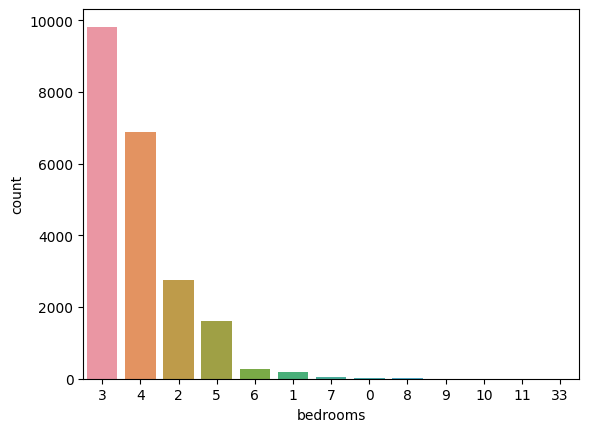

In [ ]:
from pandas.core.base import value_counts
# visulaize the number of bedrooms using countplot
sns.countplot( x=df.bedrooms,data=df,
              order = df['bedrooms'].value_counts().index)

<Axes: title={'center': 'House prices by Square Feet'}, xlabel='sqft_above', ylabel='price'>

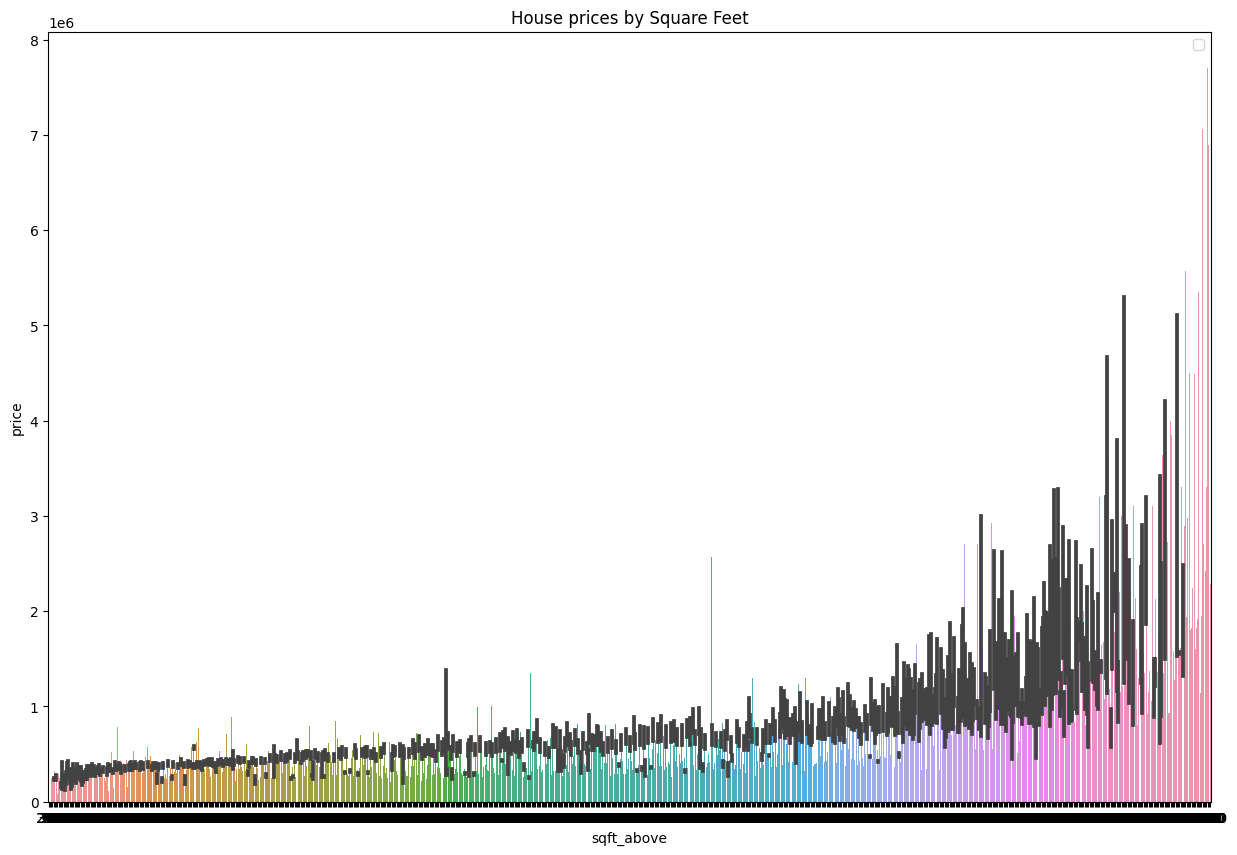

In [ ]:
# bar graph for sqft vs price

fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(15,10))
plt.title("House prices by Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("House Prices")
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

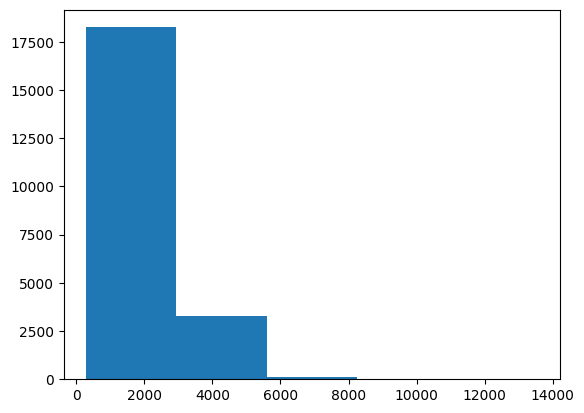

In [ ]:
# histogram for attribute square feet
plt.hist('sqft_living',data=df,bins=5)

<ipython-input-22-400fcb356c2f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

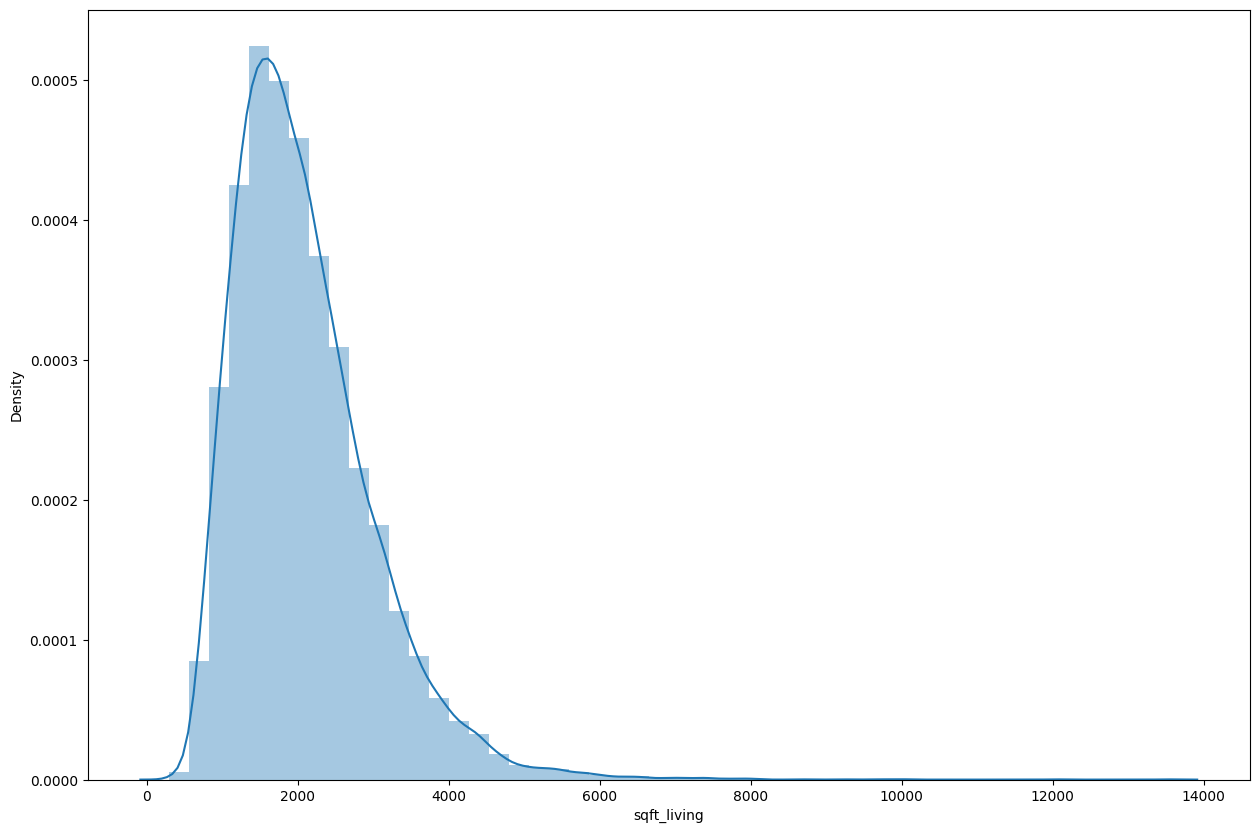

In [ ]:
# distribution plot between square feet living and density
fig,axes =plt.subplots(ncols=1,nrows=1,figsize=(15,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,
             label='sqft_living',norm_hist=True)

In [ ]:
# print the mean, median and mode of square feet living attribute
print('Mean : ',round(df['sqft_living'].mean(),2))
print('Median : ',df['sqft_living'].median())
print('Mode : ',round(df['sqft_living'].mode()[0]))

Mean :  2079.9
Median :  1910.0
Mode :  1300


<ipython-input-28-73aeb9932402>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=colormap)


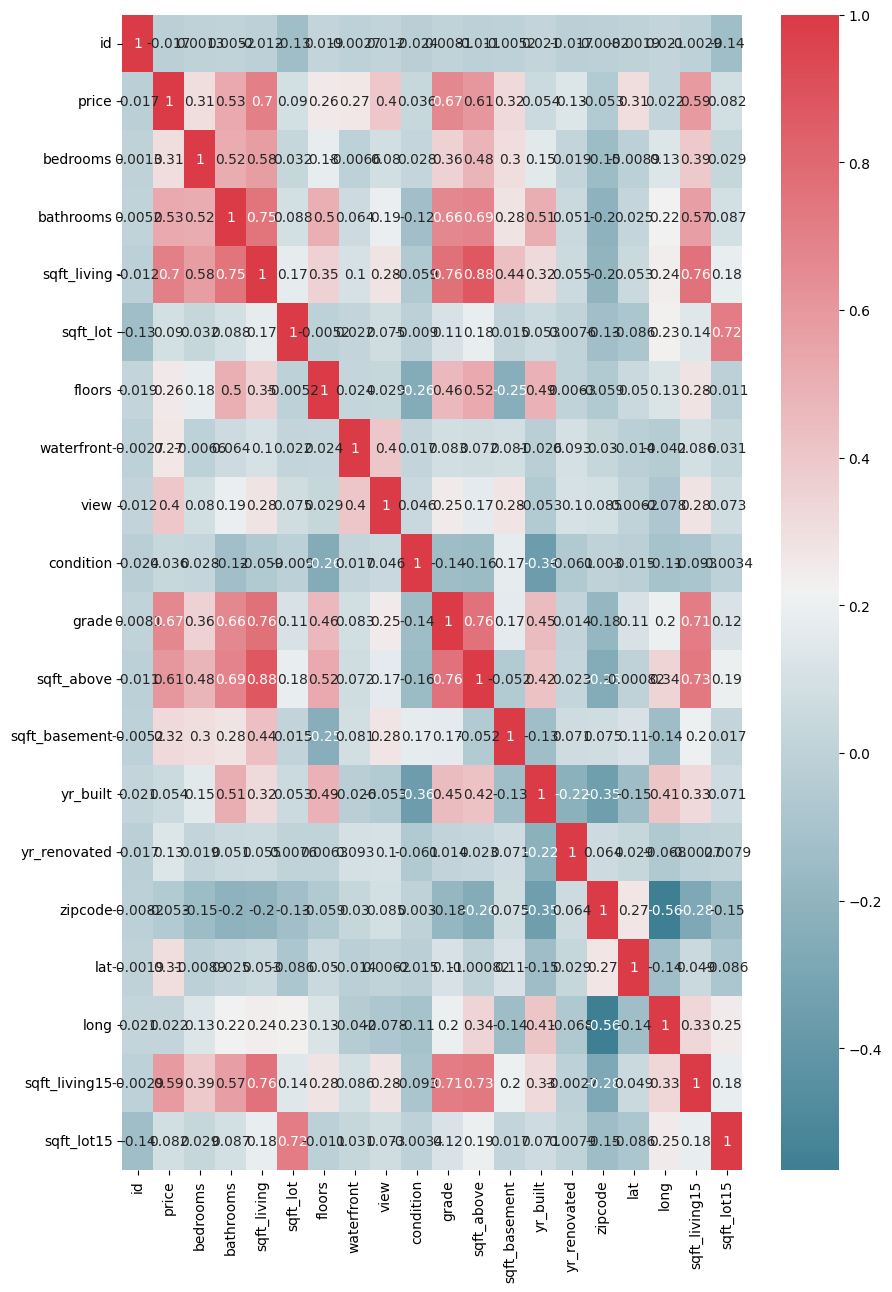

In [ ]:
# determine the correlation among attributes
def correlation_heatmap(df1):
  _,ax = plt.subplots(figsize=(10,10))
  colormap=sns.diverging_palette(220,10,as_cmap=True)
  sns.heatmap(df.corr(),annot=True,cmap=colormap)

correlation_heatmap(df)

In [ ]:
# split dataset into train and test
train_data, test_data = train_test_split(df,train_size=0.8,random_state=3)
reg = linear_model.LinearRegression()

x_train = np.array(train_data['grade']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test = np.array(test_data['grade']).reshape(-1,1)
y_test = np.array(test_data['price']).reshape(-1,1)
pred = reg.predict(x_test)


In [ ]:
# evaluate results

print("Linear Model")
mean_squared_error = metrics.mean_squared_error(y_test,pred)
print('Squared Mean Error : ',round(np.sqrt(mean_squared_error),2))
print('R Squared Training : ',round(reg.score(x_train,y_train),3))
print('R Squared Testinng : ',round(reg.score(x_test,y_test),3))
print('Intercept : ',reg.intercept_)
print('Coefficient : ',reg.coef_)

Linear Model
Squared Mean Error :  263533.43
R Squared Training :  0.442
R Squared Testinng :  0.46
Intercept :  [-1062482.07531542]
Coefficient :  [[209371.81409384]]


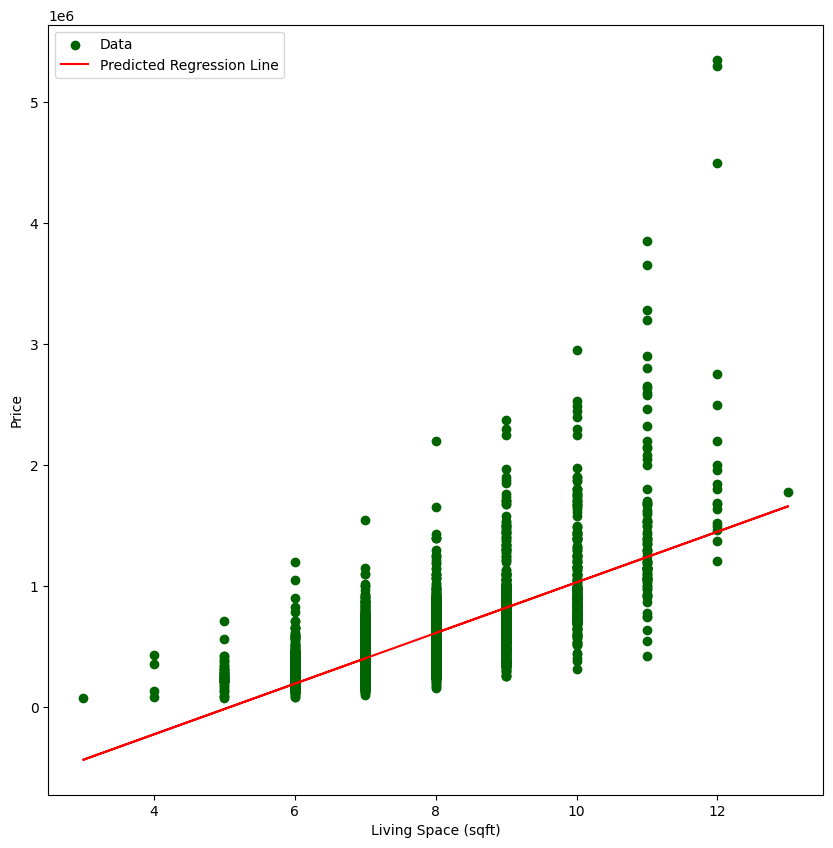

In [ ]:
# scatter plot
_,ax = plt.subplots(figsize=(10,10))
plt.scatter(x_test,y_test,color='darkgreen', label='Data')
plt.plot(x_test,reg.predict(x_test),color='red',
         label='Predicted Regression Line')
plt.xlabel('Living Space (sqft)')
plt.ylabel("Price")
plt.legend()


<Axes: xlabel='bathrooms', ylabel='price'>

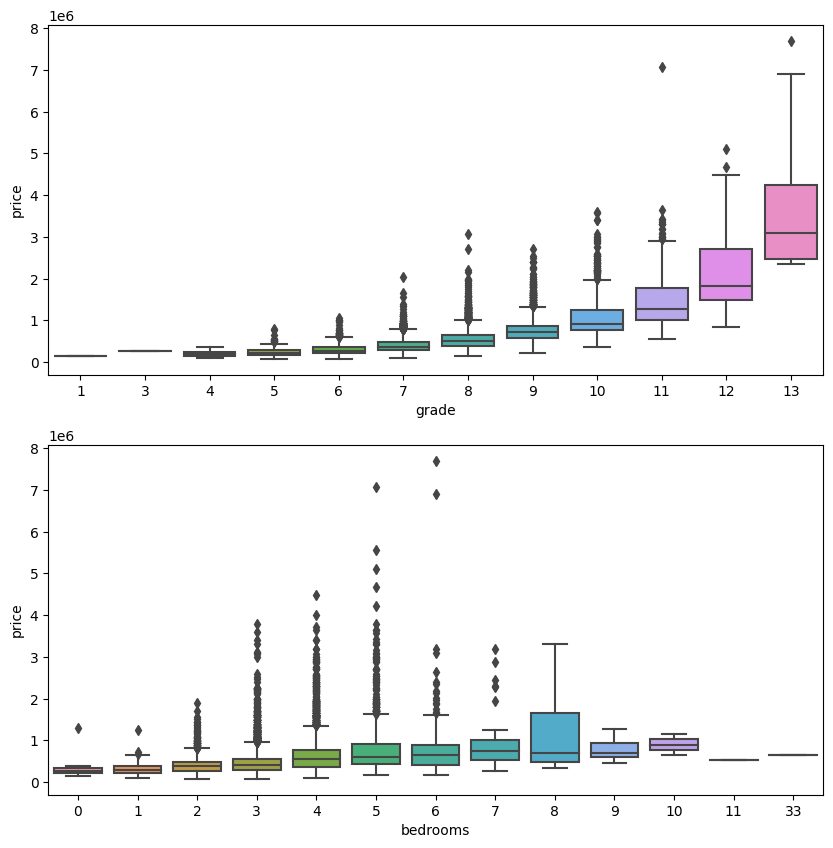

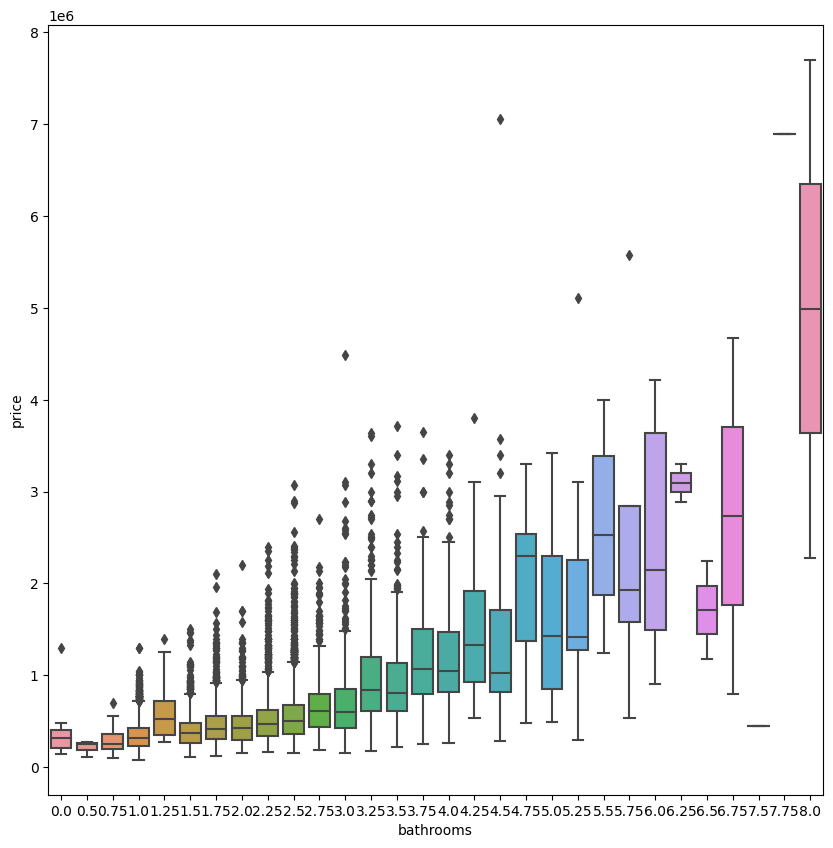

In [ ]:
# draw box plots
fig,ax = plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])

_,axes = plt.subplots(1,1,figsize=(10,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

In [ ]:
# Perform R-squared testing for the regression model
features = ['bedrooms','bathrooms','sqft_living','sqft_lot',
            'floors','waterfront',
             'view','grade','sqft_above','sqft_basement','lat','long']
reg = linear_model.LinearRegression()
reg.fit(train_data[features],train_data['price'])
pred=reg.predict(test_data[features])
print("Complex Model")
mean_squared_error = metrics.mean_squared_error(y_test,pred)
print('Squared Mean Error : ',round(np.sqrt(mean_squared_error),2))
print('R Squared Training : ',round(reg.score(train_data[features],
                                              train_data['price']),3))
print('R Squared Testinng : ',round(reg.score(test_data[features],
                                              test_data['price']),3))
print('Intercept : ',reg.intercept_)
print('Coefficient : ',reg.coef_)

Complex Model
Squared Mean Error :  202863.49
R Squared Training :  0.663
R Squared Testinng :  0.68
Intercept :  -63143139.00093705
Coefficient :  [-2.72379794e+04  3.76985543e+03  1.33769986e+02  1.15043186e-02
 -4.11410832e+04  5.56902863e+05  6.33243974e+04  8.15664526e+04
  8.08771981e+01  5.28927882e+01  6.44987999e+05 -2.62422704e+05]
